# LISTA1

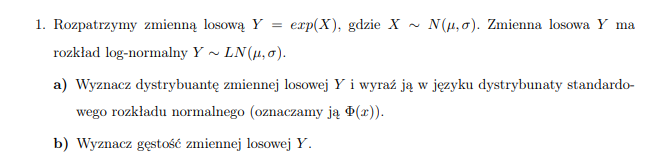
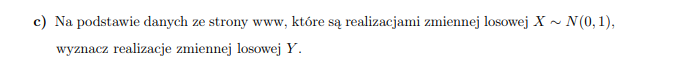

In [5]:
myData <- read.delim("dane.txt", header = FALSE)
datax <- myData[,1]
datay = exp(datax)

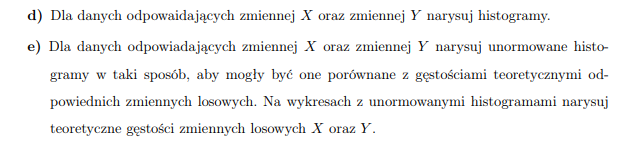

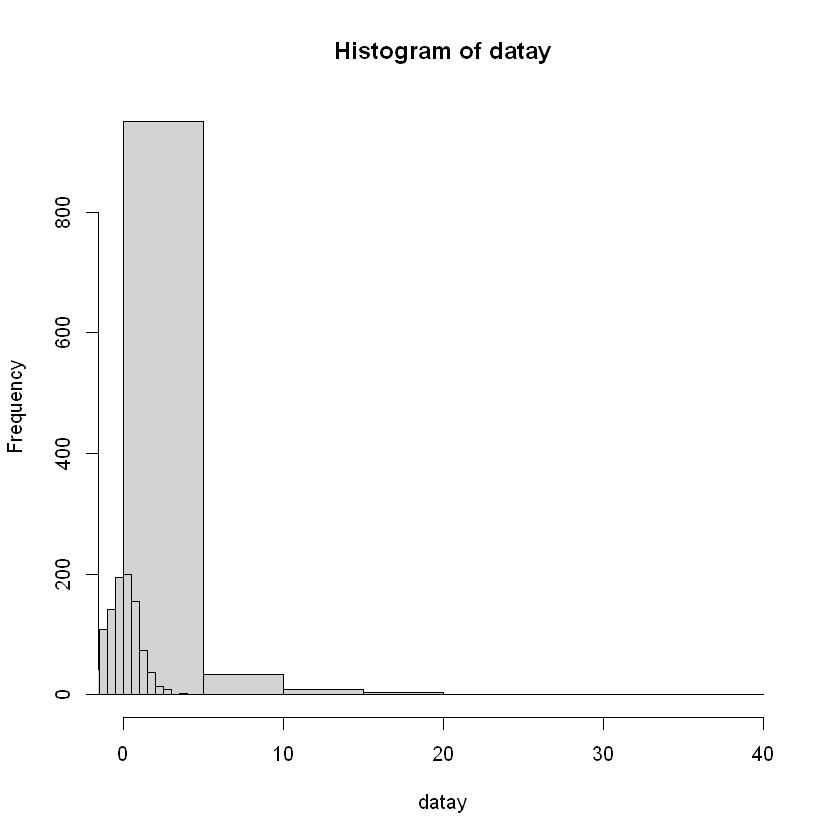

In [6]:
hist(datay)
hist(datax, add=TRUE)

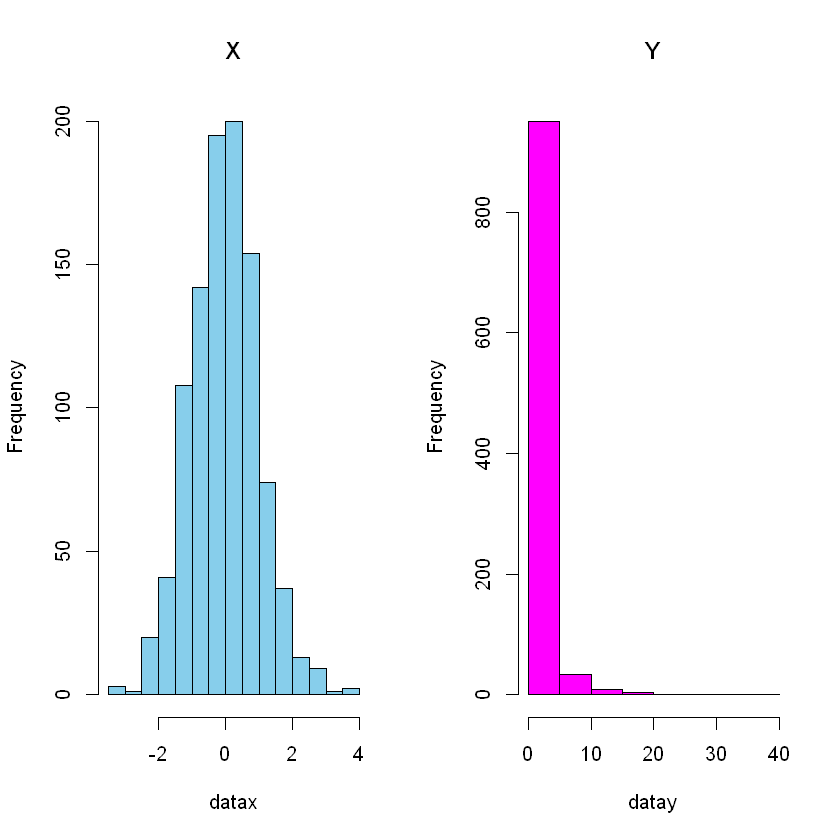

In [7]:

par(mfrow=c(1,2))
hist(datax, col='skyblue', main='X')
hist(datay, col='magenta', main="Y")

In [10]:
x <- seq(-10, 10, by = .1)
y <- dnorm(x, mean = 0, sd = 1)

a <- seq(0, 30, by = .1)
b <- dlnorm(a, mean = 0, sd = 1)

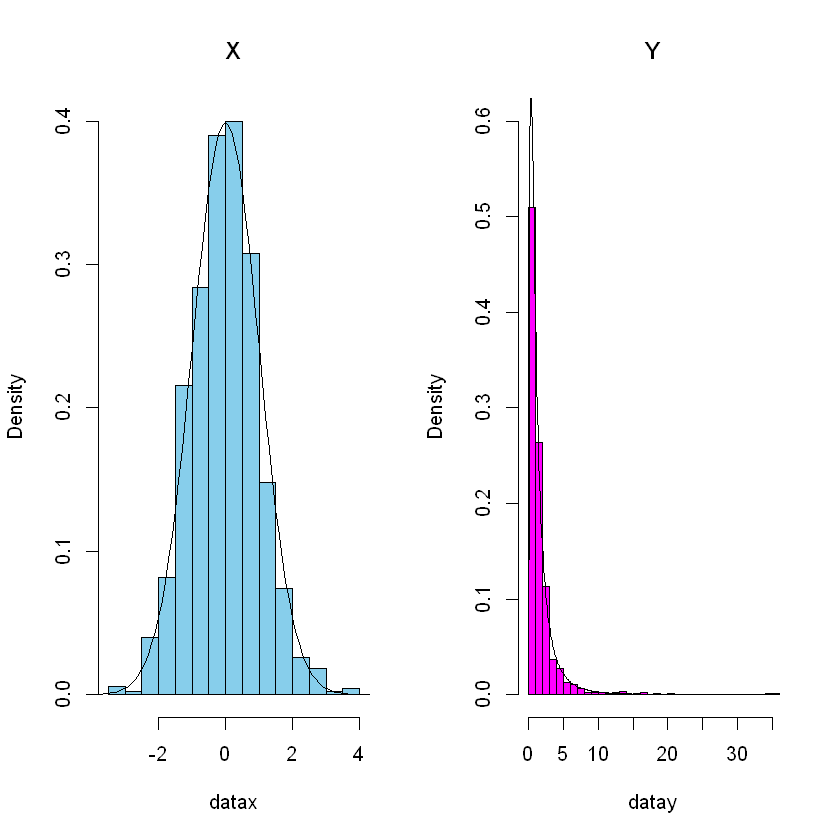

In [11]:
par(mfrow=c(1,2))
hist(datax, col='skyblue', main='X',freq=FALSE)
lines(x,y)
hist(datay, col='magenta', main="Y", freq=FALSE,breaks=50,ylim=c(0,0.6))
lines(a,b)

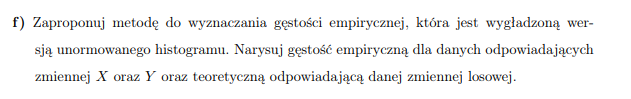

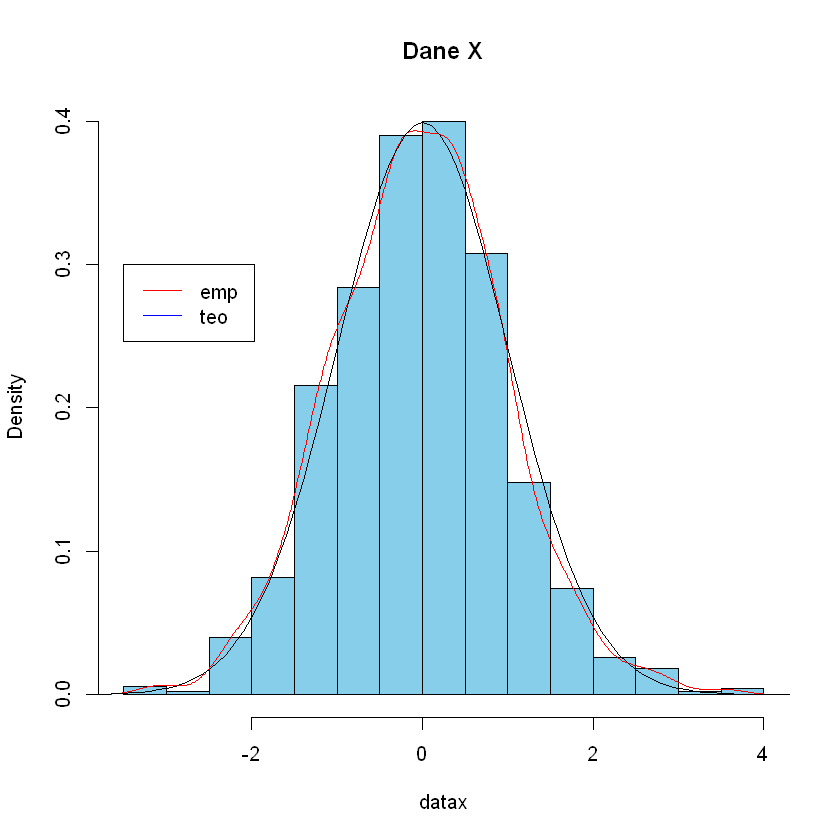

In [12]:
hist(datax, col='skyblue', main='Dane X',freq=FALSE)
lines(density(datax), col = "red")
lines(x,y)
legend(-3.5, 0.3, legend=c("emp", "teo"),
       col=c("red", "blue"), lty=1)

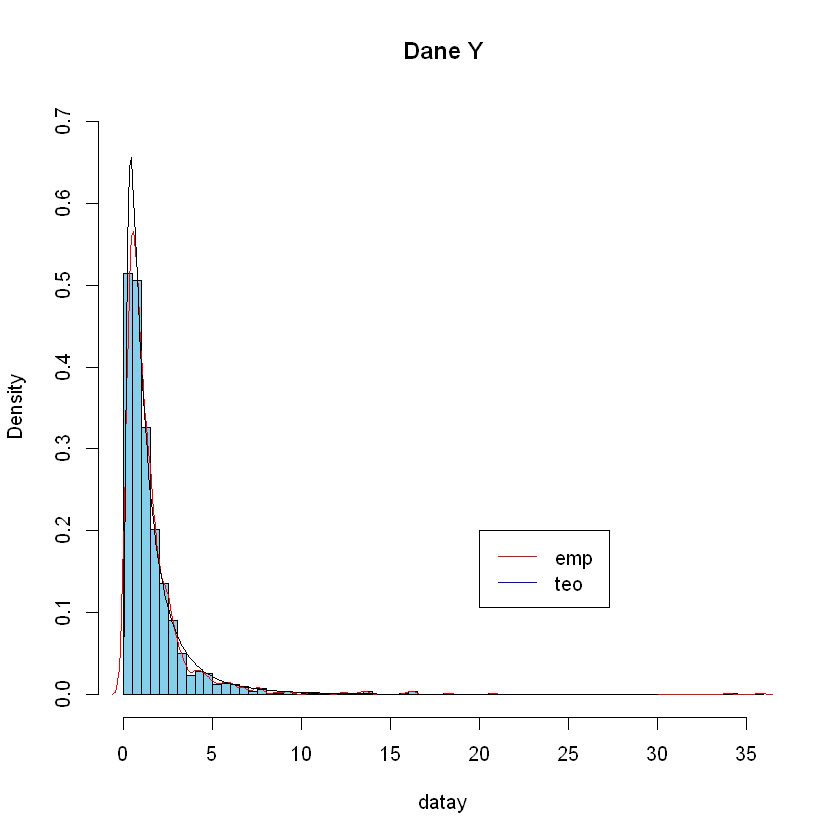

In [13]:
hist(datay, col='skyblue', main='Dane Y',freq=FALSE,  ylim = c(0,0.7), breaks=70)
lines(density(datay), col = "red")
lines(a,b)
legend(20, 0.2, legend=c("emp", "teo"),
       col=c("red", "blue"), lty=1)

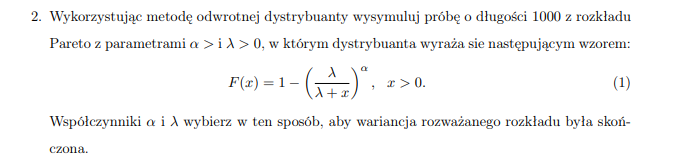

In [14]:
odwr <- function(x, alfa,lamb) {
    a <- lamb/(1-x)^(1/alfa) - lamb
    return(a)
}
gest <- function(x, alfa,lamb) {
    a <- alfa*lamb^alfa/(lamb+x)^(alfa+1)
    return(a)
}
dystr <- function(x, alfa,lamb) {
    a <- 1 - (lamb/(lamb+x))^alfa
    return(a)
}

In [15]:
data <- odwr(runif(1000),3,2)

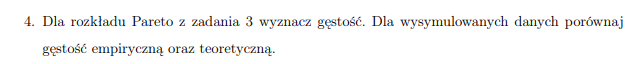

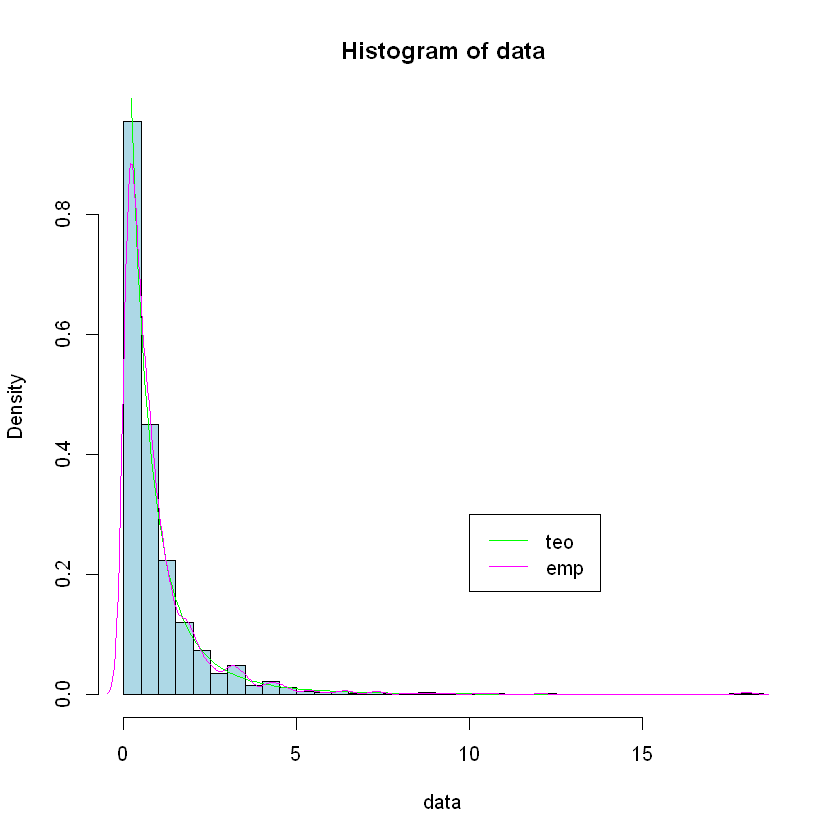

In [16]:
hist(data, freq=FALSE, breaks=50, col="lightblue")

x<-seq(0, 15, by=0.1)
y<-gest(x, 3, 2)
lines(x, y, col="green")
lines(density(data), col="magenta")
legend(10, 0.3, legend=c("teo", "emp"),
       col=c("green", "magenta"), lty=1)

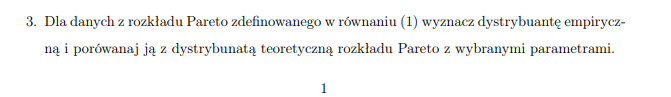

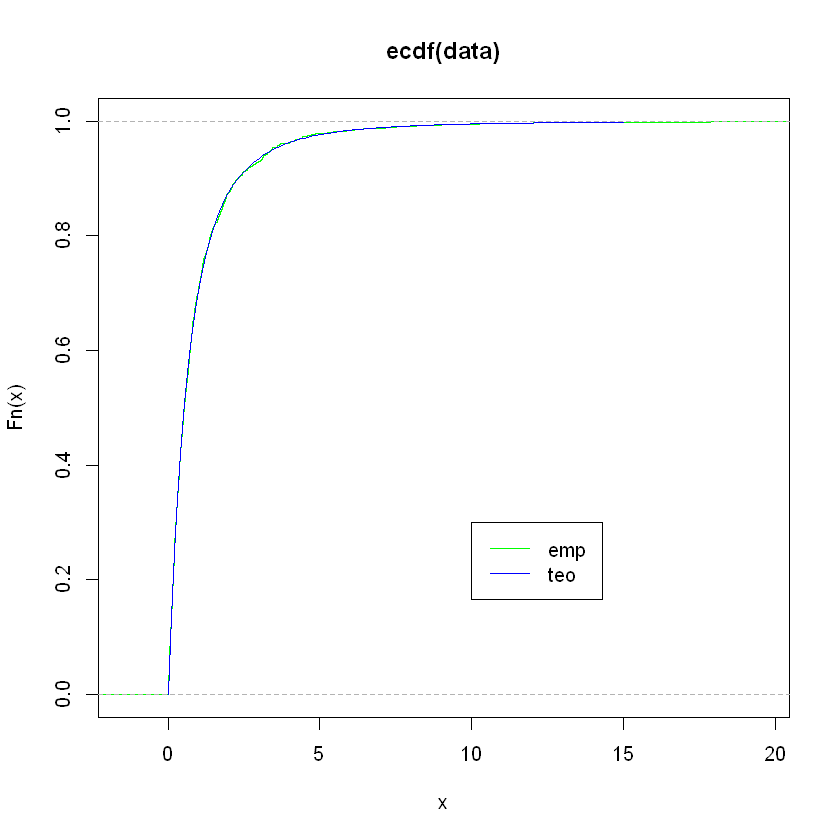

In [17]:
dis <- ecdf(data)
plot(dis, col="green")
lines(x, dystr(x,3,2), col="blue")
legend(10, 0.3, legend=c("emp", "teo"),
       col=c("green", "blue"), lty=1)

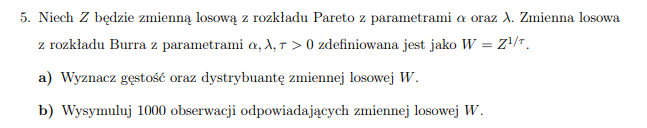

In [18]:
burr <- function(x,tau) {
    return(x^(1/tau))
}

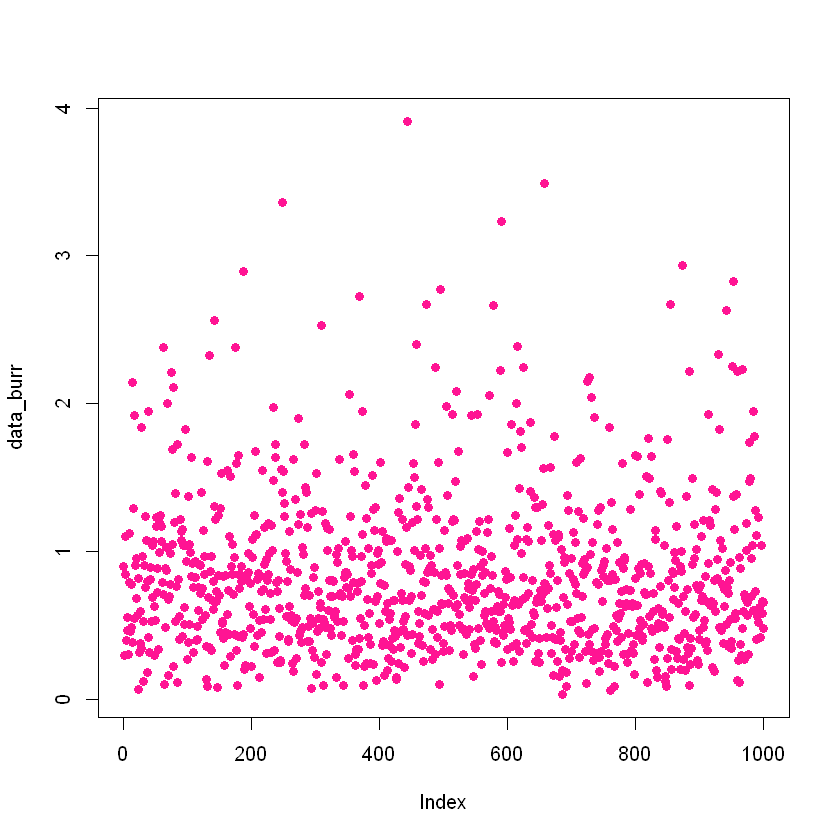

In [19]:
data_pareto <- odwr(runif(1000),3,2)
data_burr <- burr(data_pareto,2)
plot(data_burr,col="deeppink",pch=19)

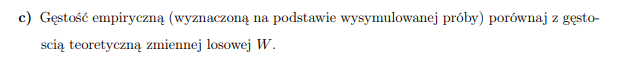

In [22]:
g_burr <- function(x,tau, alfa, lamb) {
    a <- tau*alfa*lamb^alfa/(lamb + x^(tau))^(alfa+1)*x^(tau-1)
    return(a)
}
d_burr <- function(x,tau, alfa, lamb) {
    return(1 - (lamb/(lamb+x**tau))^alfa)
}

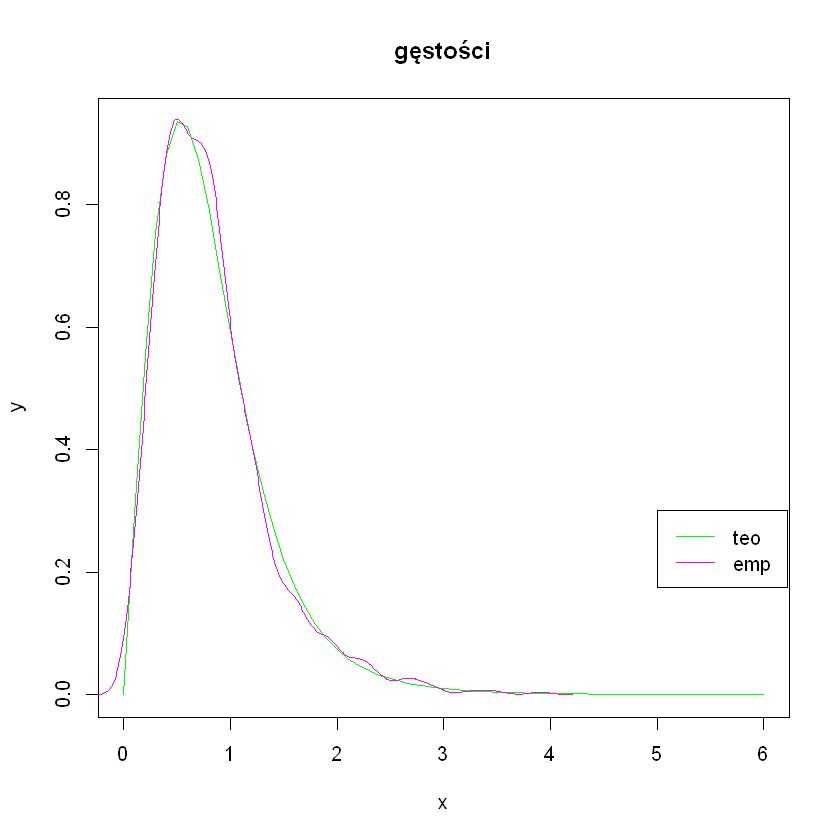

In [23]:
x<-seq(0, 6, by=0.1)
y<-g_burr(x, 2, 3, 2)
plot(x, y, col="green",type="l",main = "gęstości")
lines(density(data_burr), col="magenta")
legend(5, 0.3, legend=c("teo", "emp"),
       col=c("green", "magenta"), lty=1)

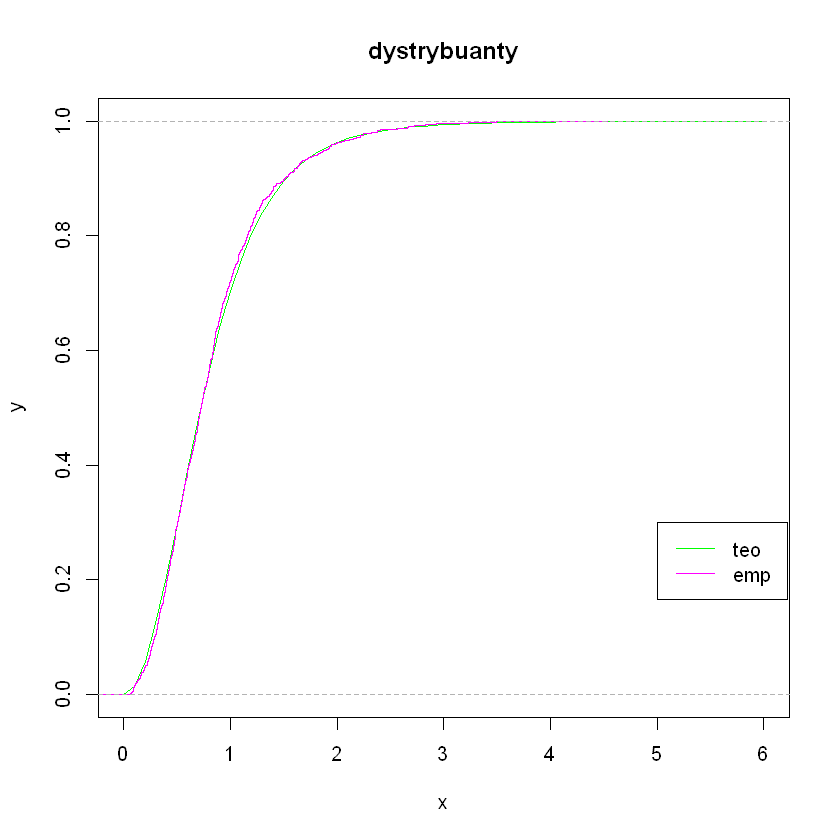

In [24]:
x<-seq(0, 6, by=0.1)
y<-d_burr(x, 2, 3, 2)
plot(x, y, col="green",type="l",main = "dystrybuanty")
lines(ecdf(data_burr), col="magenta")
legend(5, 0.3, legend=c("teo", "emp"),
       col=c("green", "magenta"), lty=1)

# LISTA2

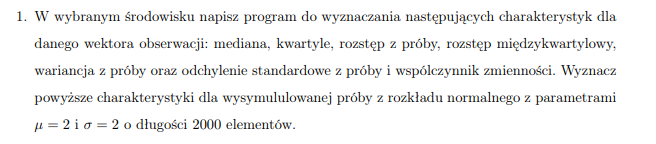

In [69]:
characters <- function(data) {
    n <- length(data)
    sort_data <- sort(data)
    
    if (n%%2 == 1) {
        median <- sort_data[ceiling(n/2)]
    }
    else {
        median <- mean(c(sort_data[n/2], sort_data[n/2 + 1]))
    }
    
    first_q <- sort_data[ceiling(n/4)]
    third_q <- sort_data[ceiling(3*n/4)]
    iqr <- third_q - first_q
    rozstep = sort_data[n] - sort_data[1]
    cat("mediana: ", median, "\nQ1: ", first_q, "\nQ3: ", third_q, "\nIQR: ", iqr, "\nrozstęp próby: ", rozstep)
    
    sr <- sum(data)/n
    var <- sum((data - sr)^2)/(n-1)
    dx <- sqrt(var)
    zm <- dx/sr*100
    cat("\nśrednia: ", sr, "\nVAR: ", var, "\nDX: ", dx, "\nwsp zmienności: ", zm, '%')
    
}

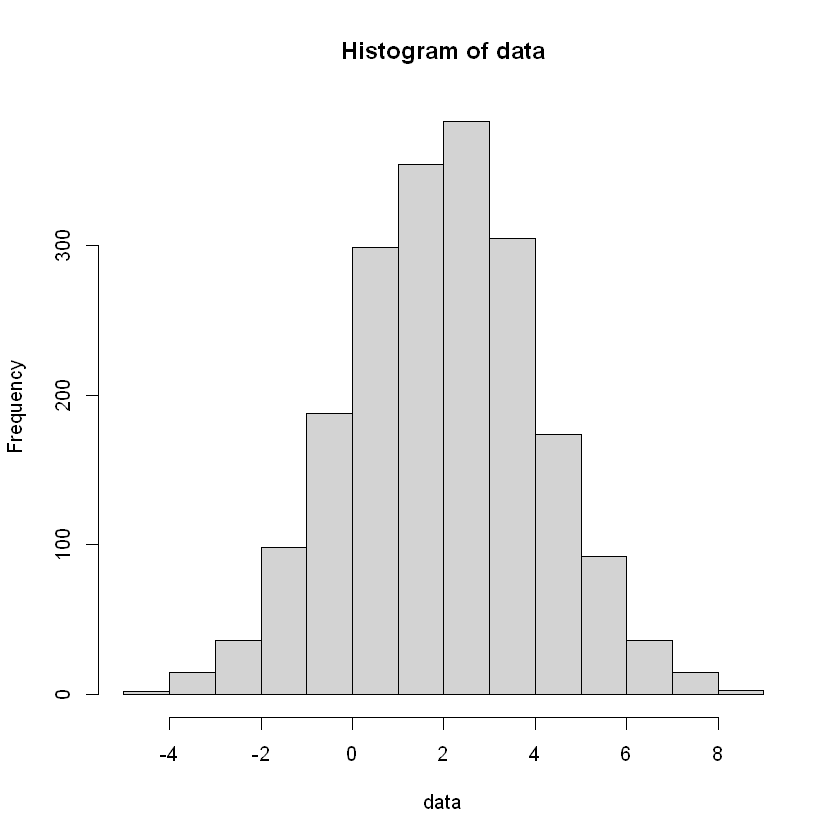

In [67]:
data <- rnorm(2000,2,2)
hist(data)

In [68]:
characters(data)

mediana:  2.026707 
Q1:  0.6093411 
Q3:  3.321136 
IQR:  2.711795 
rozstęp próby:  13.596
średnia:  1.979319 
VAR:  4.250125 
DX:  2.061583 
wsp zmienności:  104.1562 %

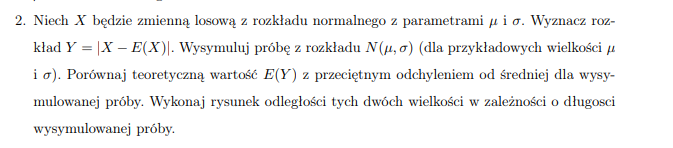

In [72]:
seq(0,10,1)

[1]  0  1  2  3  4  5  6  7  8  9 10

In [ ]:
 def gg(t,m,s):
    return 2/s/math.sqrt(2*math.pi)*math.exp(-(t/s)**2/2)

In [70]:
gg <- function(t,m,s) {
    return(2/s/sqrt(2*pi)*exp(-(t/s)^2/2))
}

In [75]:
rep(2,10)

[1] 2 2 2 2 2 2 2 2 2 2

In [109]:
gen_y <- function(m, s, N = 1000) {
    data_x <- rnorm(N, m, s)
    data_y <- abs(data_x-m)
    hist(data_y, breaks = 30, freq=FALSE)
    xs <- seq(0, 10, 0.01)
    ys <- gg(xs,m,s)
    lines(xs,ys)
    
    l_N <- seq(0, 10, 1)
    ey <- 2*s/sqrt(2*pi)
    odl <- sum(data_y)/(l_N +1)
    print(odl)
    plot(l_N, odl, type="p", col="blue", ylim=c(-2,2000), main="i don't understand wtf is happening here")
    lines(l_N, rep(ey,length(l_N)), type="l", col="red")
}

 [1] 1598.1606  799.0803  532.7202  399.5401  319.6321  266.3601  228.3087
 [8]  199.7701  177.5734  159.8161  145.2873


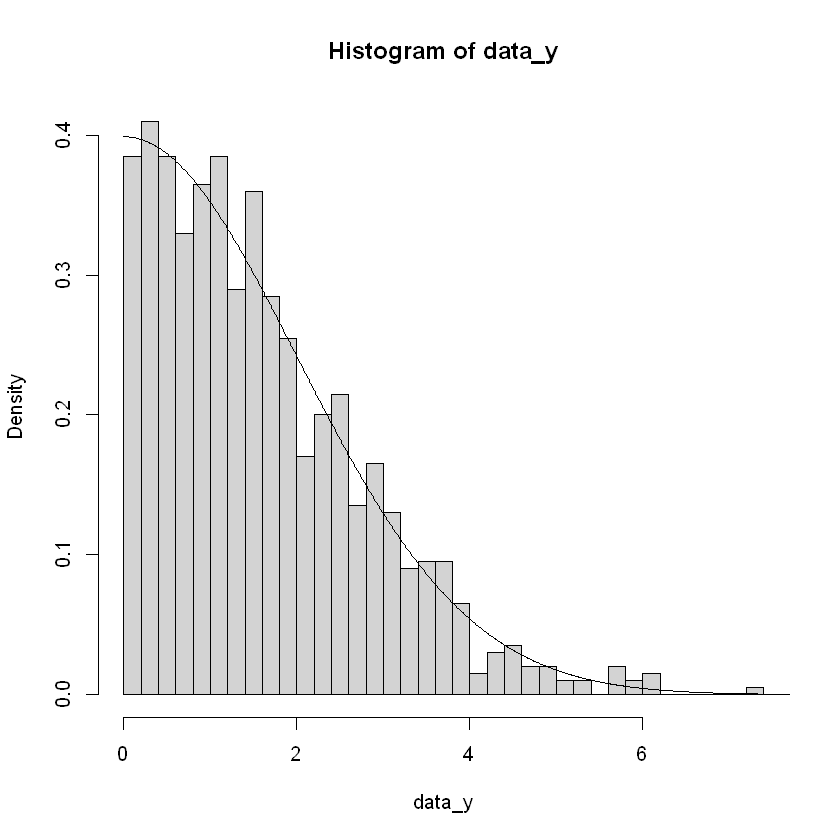

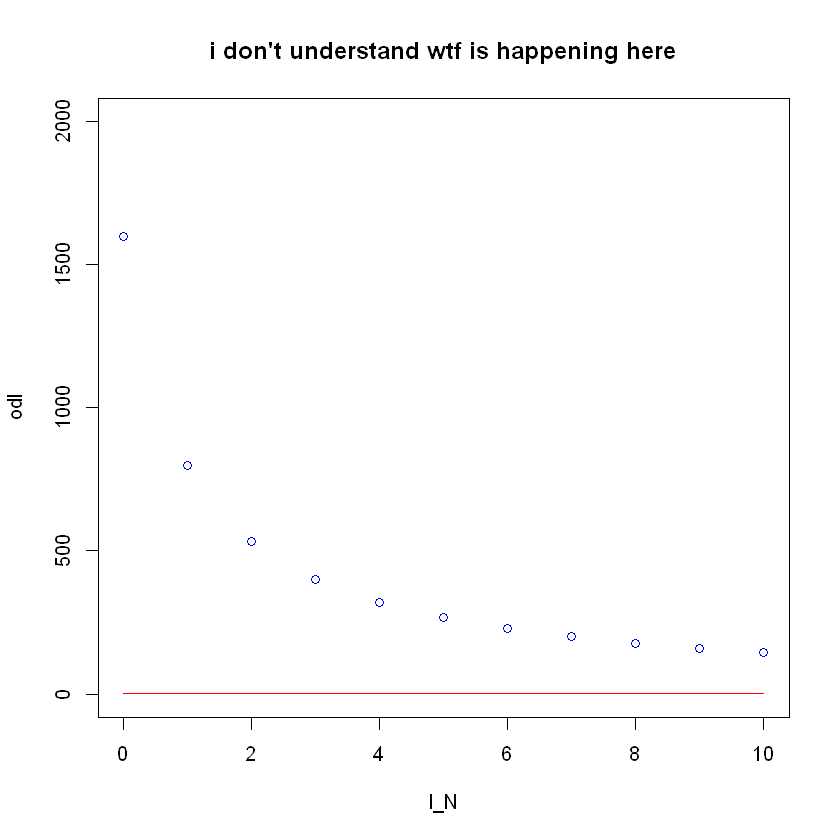

In [110]:
gen_y(2,2,1000)

In [126]:
sym <- function(m,s,LN) {
    ey=2*s/sqrt(2*pi)
    plot(seq(0,LN,50), rep(ey, length(seq(0,LN,50))), ylim=c(1.2,2), type="l", col="red", main="średnia teoretyczna a empiryczna")
    for (N in seq(50,LN,100)) {
        data_x <- rnorm(N,m,s)
        data_y <- abs(data_x-m)
        sr = sum(data_y)/N
        points(N, sr, pch=19)
        }
}

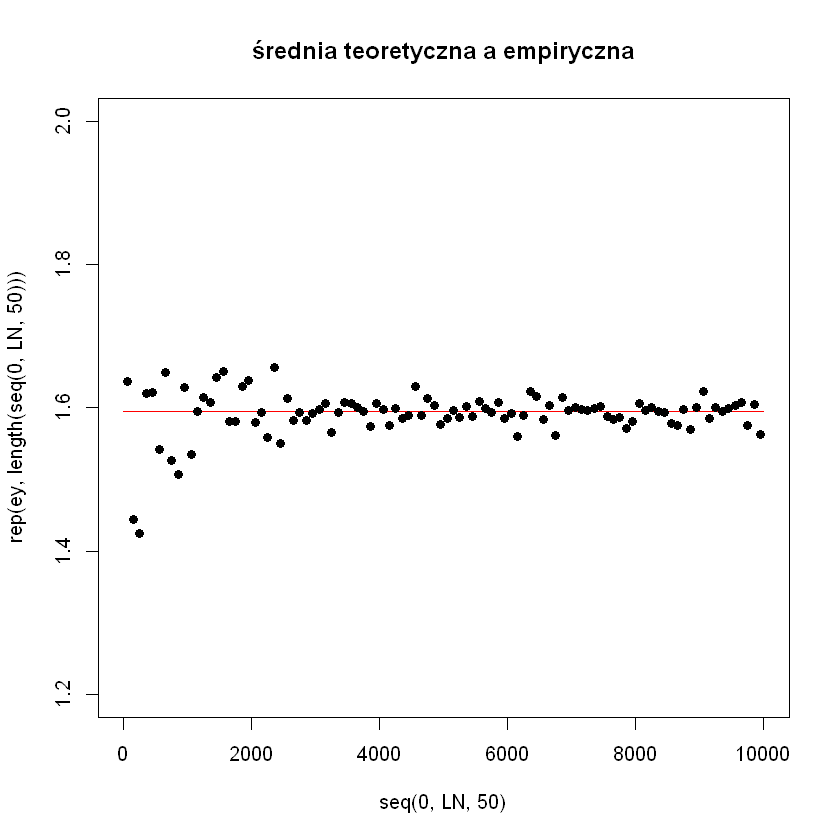

In [127]:
sym(2,2,10000)

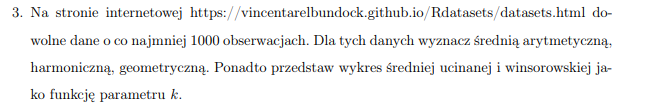

[1] 41 44 19 29 28 40 47 36 49 44 33 49 28 32 29 47 36 48 28 24 39 32 60 37
   [25] 31 33 49 28 24 27 31 41 36 48 50 45 23 29 51 32 57 27 30 39 18 58 48 30
   [49] 37 41 46 26 34 34 34 46 44 34 35 32 51 28 33 40 35 32 49 48 48 37 51 26
   [73] 49 19 45 31 23 39 28 43 41 50 58 19 29 54 32 40 39 20 32 62 45 37 60 40
   [97] 33 26 41 28 54 56 46 34 28 36 34 37 34 22 41 45 37 46 44 27 66 26 67 48
  [121] 31 31 41 19 37 32 41 40 35 58 31 76 28 24 30 28 43 42 26 26 29 21 26 35
  [145] 30 36 27 30 39 37 35 30 34 22 24 21 54 27 22 56 28 37 24 32 21 38 20 50
  [169] 62 76 55 37 30 46 60 61 41 33 24 23 20 55 52 23 42 44 28 25 40 50 42 34
  [193] 23 37 65 37 78 33 25 35 40 19 44 71 20 43 31 50 40 30 53 63 51 23 27 29
  [217] 23 21 63 59 24 27 39 29 29 35 40 21 60 39 31 35 40 49 38 28 32 31 32 23
  [241] 44 36 61 42 35 37 37 32 45 62 47 27 26 21 30 32 31 34 34 37 28 37 30 30
  [265] 37 28 31 33 19 19 28 29 29 38 39 78 25 42 24 47 25 25 29 35 55 34 38 55
  [289] 34 20 24 23 56 33 36 29 51 48 45 53 35 36 29 79 27 27 20 46 37 48 37 34
  [313] 41 55 37 44 24 24 23 58 57 19 50 52 24 47 34 65 37 31 39 30 43 42 47 46
  [337] 35 67 40 45 37 35 37 19 24 35 48 42 25 25 37 39 50 35 36 23 23 59 29 24
  [361] 29 30 22 64 39 49 57 30 48 45 26 31 31 33 64 48 46 41 30 32 57 56 22 42
  [385] 31 25 21 31 55 28 41 20 32 36 34 31 49 50 34 64 60 55 24 46 30 32 40 31
  [409] 41 61 47 45 19 19 30 34 35 38 44 33 31 70 19 40 45 40 41 40 45 53 24 26
  [433] 44 52 28 56 63 42 26 22 46 67 24 47 35 31 21 31 32 37 27 22 35 40 39 52
  [457] 40 40 35 33 41 25 26 57 34 30 29 34 25 59 46 29 37 34 39 29 25 64 56 38
  [481] 22 41 33 33 35 36 52 67 41 30 22 68 64 42 53 42 58 38 21 60 20 35 22 30
  [505] 60 62 44 25 55 31 43 31 42 57 59 43 37 58 53 56 25 53 21 32 46 37 35 36
  [529] 33 35 49 28 27 22 51 48 20 22 20 25 42 40 48 20 34 34 41 43 49 31 37 18
  [553] 18 78 40 33 45 59 54 27 25 42 54 29 32 19 40 31 40 22 37 38 64 34 38 39
  [577] 40 49 59 30 28 34 54 25 36 33 55 50 44 24 52 22 23 31 41 53 35 46 34 25
  [601] 40 50 44 32 32 34 51 32 27 35 35 23 38 32 28 33 29 39 43 43 30 55 40 39
  [625] 36 18 25 28 25 60 27 25 30 61 31 42 38 37 44 18 23 20 31 30 50 30 24 54
  [649] 24 28 49 38 37 46 47 38 49 53 64 20 50 39 35 38 23 23 23 37 28 52 32 34
  [673] 49 54 36 57 59 31 20 39 36 32 31 35 29 34 45 40 58 27 30 61 35 25 31 34
  [697] 45 28 46 22 21 25 59 27 44 48 23 57 39 35 55 52 56 26 28 37 34 25 33 32
  [721] 26 27 27 38 34 25 32 52 36 33 44 41 32 36 38 33 52 29 64 38 32 30 32 36
  [745] 36 31 50 22 29 39 24 25 23 22 81 26 58 23 30 45 21 50 29 42 73 48 46 29
  [769] 26 26 56 44 46 59 47 23 26 25 42 53 44 29 60 33 32 33 23 34 41 26 22 33
  [793] 31 40 32 34 36 30 51 18 60 25 21 46 46 38 35 33 46 49 37 32 27 52 39 42
  [817] 23 43 32 32 26 51 35 27 24 48 49 50 46 26 35 40 43 25 22 42 47 45 44 24
  [841] 66 42 29 32 48 57 32 26 33 51 46 30 25 41 45 44 53 40 39 39 24 23 20 55
  [865] 52 44 25 40 32 33 40 45 26 32 31 62 56 25 24 35 34 44 34 31 25 27 62 38
  [889] 34 44 47 54 43 41 33 38 37 32 42 41 34 36 48 44 71 22 24 24 41 44 35 19
  [913] 42 39 22 28 41 34 40 21 24 60 40 36 26 32 66 59 28 27 68 44 68 56 66 31
  [937] 30 26 56 54 28 40 54 28 19 48 32 35 33 59 19 20 44 35 43 39 30 42 31 46
  [961] 46 28 49 59 88 19 18 57 33 27 46 36 24 26 49 52 45 23 22 35 37 28 34 41
  [985] 35 32 19 44 54 23 41 29 38 49 31 57 42 40 45 24 24 25 39 39 54 30 30 32
 [1009] 33 40 46 28 42 18 45 41 23 30 33 40 33 44 22 46 26 25 52 50 57 36 44 34
 [1033] 21 62 41 18 39 28 44 38 40 34 23 22 56 40 49 38 31 56 41 22 55 38 46 22
 [1057] 39 34 46 48 43 20 26 43 31 37 55 51 21 52 21 26 61 58 33 61 29 50 48 26
 [1081] 35 43 33 43 27 53 45 46 44 22 23 30 29 43 29 29 55 50 44 30 22 22 23 49
 [1105] 24 24 26 54 32 32 27 33 20 27 48 18 48 34 42 39 39 40 30 29 21 48 40 30
 [1129] 34 37 33 27 54 50 45 40 37 30 40 21 36 28 45 25 22 62 30 28 18 20 61 31
 [1153] 31 39 51 32 33 34 60 44 27 27 45 45 43 41 53 55 21 45 45 35 21 19 24 52
 [1177] 23 23 23 50 20 19 34 44 32 34 44 31 26 23 42 54 44 45 21 35 49 26 41 42
 [12

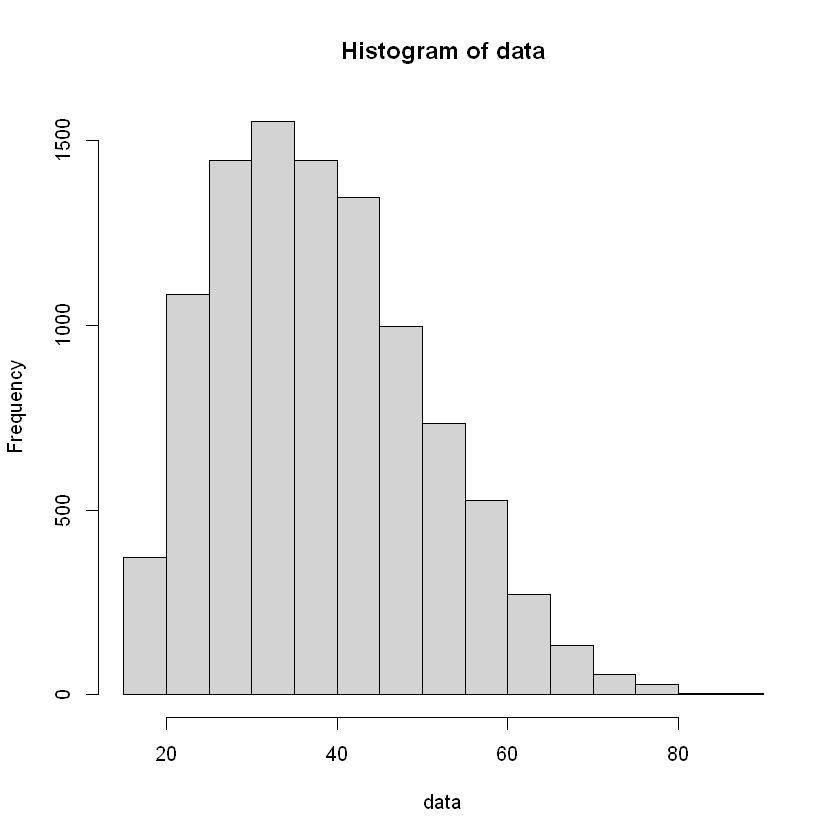

In [185]:
myData <- read.delim("smoke.txt", header = FALSE)
data_t <- myData[,1]
data_t <- data_t[-1]
for (n in seq(1,length(data_t),1)) {
    data_t[n] <- strsplit(data_t[n],",")[[1]][4]
}
data <- as.numeric(data_t)
data
hist(data)

In [183]:

srednie <- function(data) {
    x_sr <- sum(data)/length(data)
    
    odw <- sum(1/data)
    harm <- length(data)/odw
    
    prod <- 1
    for (d in data) {
        prod <- prod*d^(1/length(data))
    }
    #geom = prod**(1/len(data))
    #geom = gmean(data)
    
    cat("średnia arytmetyczna: ", x_sr, "\nśrednia harmoniczna: ", harm, "\nsrednia geometryczna: ", prod)
               
}

In [186]:
srednie(data)

średnia arytmetyczna:  38.6932 
średnia harmoniczna:  34.99779 
srednia geometryczna:  36.82442

In [215]:
ucinana <- function(k, data) {
    n <- length(data)
    data <- sort(data)
    
    if (k > n) {
        print("wrong k")
        return()
    }
    
    val <- 1/(n - 2*k)*sum(data[(k+1):(n-k)])
    
    return(val)
}

In [257]:
ucinana(100, data)

[1] 38.54265

In [210]:
mean(data, trim=0.01)

[1] 38.54265

In [255]:
winsor <- function(k, data) {
    n <- length(data)
    data <- sort(data)
    
    if (k > n) {
        print("wrong k")
        return()
    }
    
    val <- 1/n*((k + 1)*data[k + 1] + sum(data[(k + 2):(n - k - 1)]) + (k + 1)*data[n - k])
    
    return(val)
}

In [266]:
ks <- dw <- du <- seq(1,100,1)
for (n in ks) {
    dw[n] <- winsor(n,data)
}
for (n in ks) {
    du[n] <- ucinana(n,data)
}
mn <- rep(mean(data),length(ks))


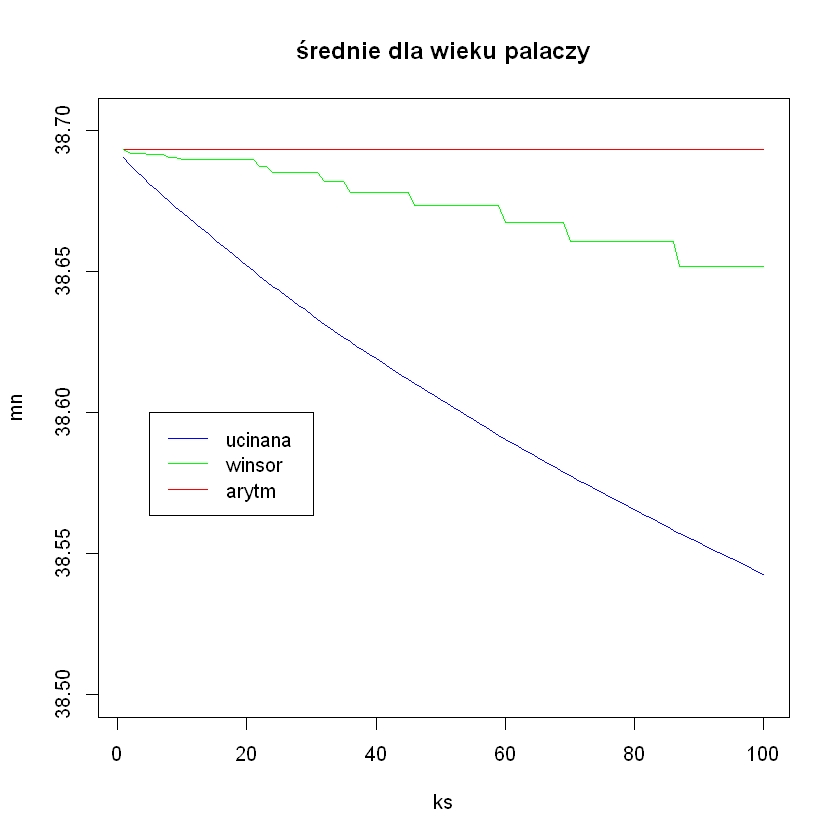

In [275]:
plot(ks,mn,type="l", col="red", ylim=c(38.5,mean(data)+0.01), main="średnie dla wieku palaczy")
lines(ks,du,col="blue")
lines(ks,dw,col="green")
legend(5, 38.6, legend=c("ucinana", "winsor","arytm"),
       col=c("blue", "green","red"), lty=1)

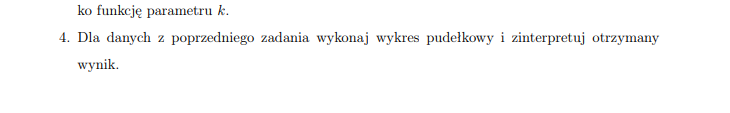

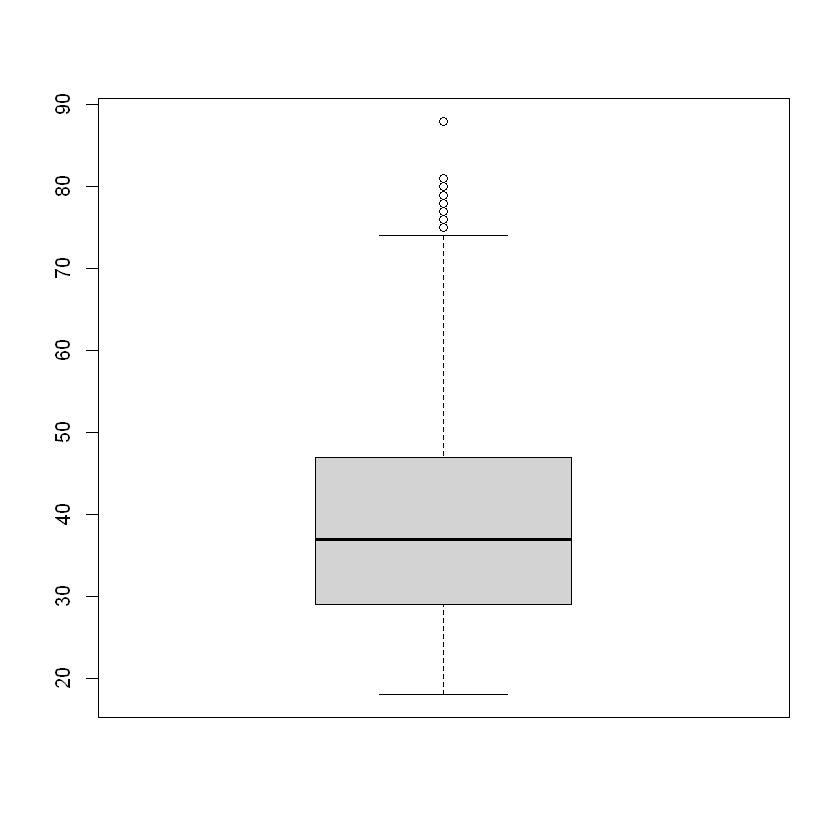

In [277]:
boxplot(data)

# LISTA 3

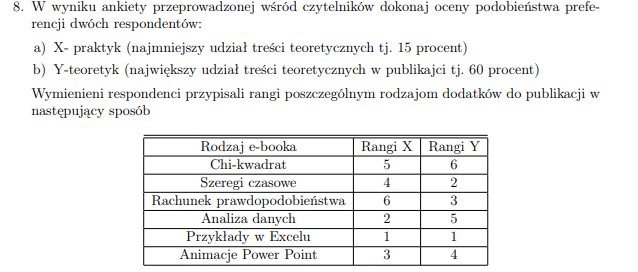

In [3]:
X <- c(5,4,6,2,1,3)
Y <- c(6,2,3,5,1,4)
x_sr <- mean(X)
y_sr <- mean(Y)
sn <- sum(X*Y)

In [4]:
data_x <- (X-x_sr)**2
varx <- 1/(length(X)-1)*sum(data_x)

data_y <- (Y-y_sr)**2
vary <- 1/(length(Y)-1)*sum(data_y)

sx <- varx**(1/2)
sy <- vary**(1/2)

In [5]:
ro <- (sn-length(X)*x_sr*y_sr)/(length(X)-1)/sx/sy
ro

[1] 0.3142857

# LISTA 4

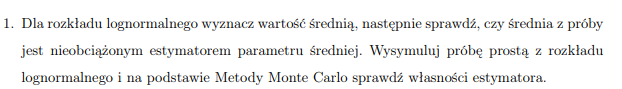

In [ ]:
def lognorm(m,s):
    sum1 = []
    sum2 = []
    
    for i in range(100):
        data1 = [box_muller(m,s) for N in range(500)]
        xs = [data1[i][0] for i in range(len(data1))]
        ys = [data1[i][1] for i in range(len(data1))]
        data = xs + ys
        datax1 = [math.e**x for x in data]
        sum1.append(sum(datax1)/len(datax1))
        
        data2 = [box_muller(m,s) for N in range(50000)]
        xs = [data2[i][0] for i in range(len(data2))]
        ys = [data2[i][1] for i in range(len(data2))]
        data = xs + ys
        datax2 = [math.e**x for x in data]
        sum2.append(sum(datax2)/len(datax2))
    
    #print(sum1)
    
    #plt.subplot(1,2,1)
    plt.boxplot([sum1, sum2])
    plt.axhline(math.e**(m+s**2/2))
    #plt.ylim(1.4,1.9)
    
    #plt.subplot(1,2,2)
    #plt.boxplot(sum2)
    #plt.axhline(math.e**(m+s**2/2))
    #plt.ylim(1.4,1.9)
    
    plt.show()

In [13]:
lognorm <- function(m,s) {
    sum1 <- sum2 <- rep(0,100)
    for (i in seq(1,100,1)) {
        data_norm <- rnorm(500,m,s)
        data1 <- exp(data_norm)
        sum1[i] <- mean(data1)
        
        data_norm <- rnorm(50000,m,s)
        data2 <- exp(data_norm)
        sum2[i] <- mean(data2)
    }
    data <- data.frame(N_500 = sum1, N_50000=sum2)
    boxplot(data)
}

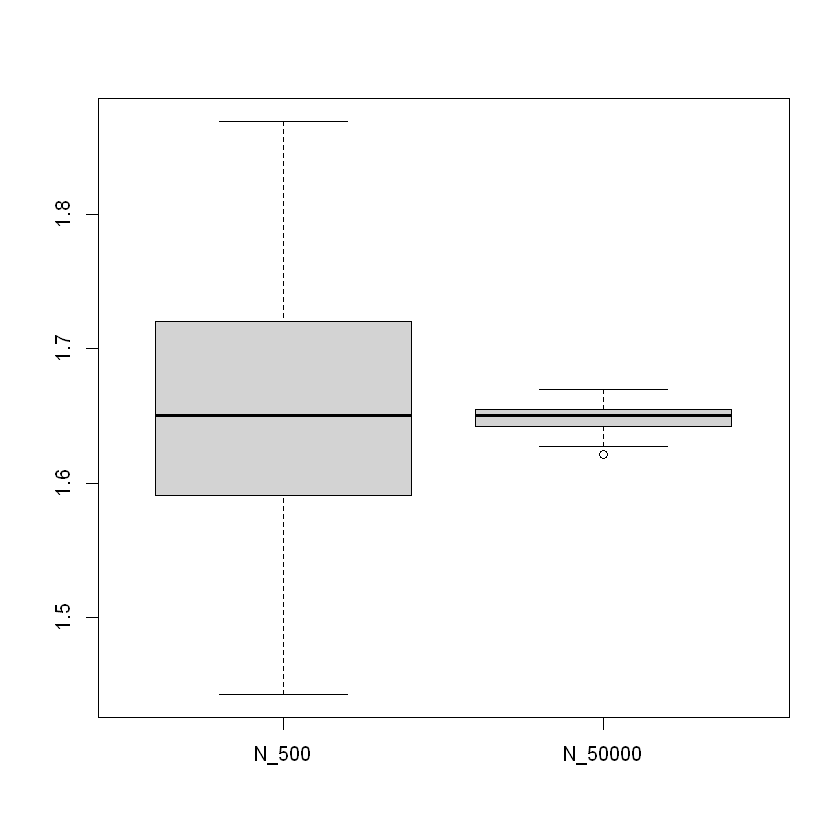

In [14]:
lognorm(0,1)

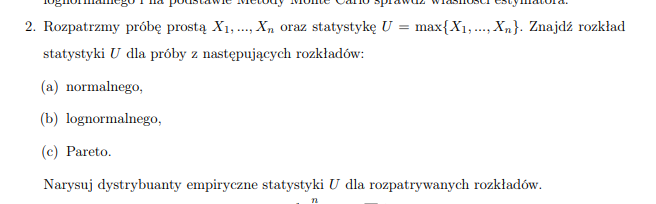

In [ ]:

def noorm(m,s):
    data_max = []
    for i in range(1000):
        data2 = [box_muller(m,s) for N in range(500)]
        xs = [data2[i][0] for i in range(len(data2))]
        ys = [data2[i][1] for i in range(len(data2))]
        data = xs + ys
        val = max(data)
        data_max.append(val)
        
    x1,y1 = dcst.ecdf(data_max)
    plt.plot(x1,y1, label="emp")
    xs = np.arange(2,5.2,0.1)
    y = [(norm.cdf(x, loc=m, scale = s))**1000 for x in xs]
    plt.plot(xs,y, label="teo")
    plt.legend()
    plt.show()

In [44]:
noorm <- function(m,s) {
    data <- rep(0,1000)
    for (i in seq(1,1000,1)) {
        vals <- rnorm(1000,m,s)
        data[i] <- max(vals)
    }
    plot(ecdf(data), col="green")
    x <- seq(0, max(data),0.1)
    lines(x, pnorm(x,m,s)^1000, col="blue")
    legend(4, 0.3, legend=c("emp", "teo"), col=c("green", "blue"), lty=1)
}

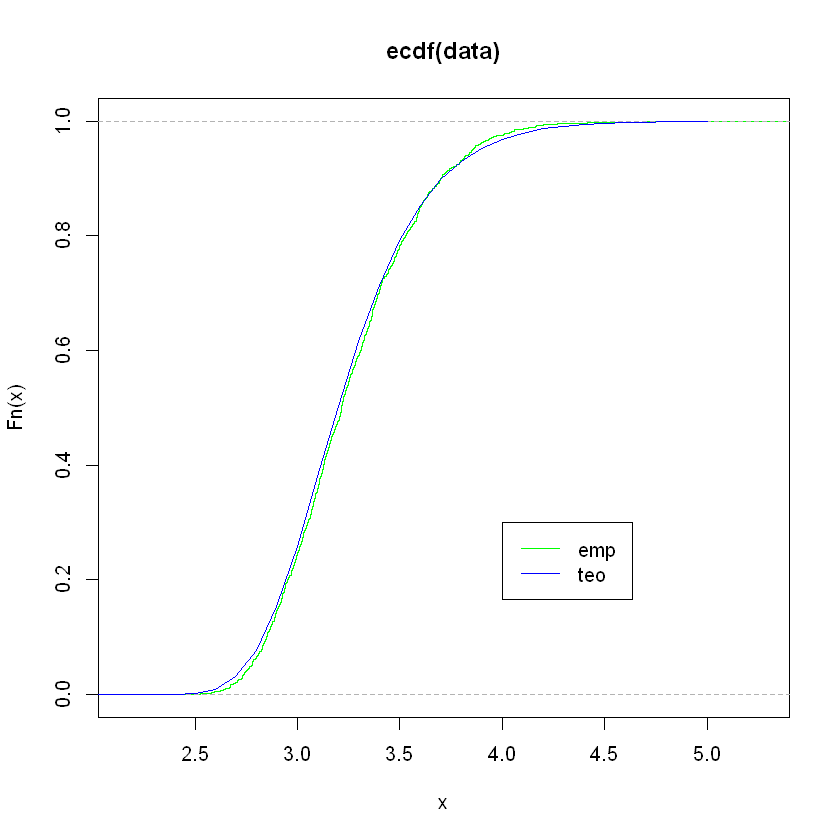

In [45]:
noorm(0,1)

In [46]:
lognoorm <- function(m,s) {
    data <- rep(0,1000)
    for (i in seq(1,1000,1)) {
        vals <- rlnorm(1000,m,s)
        data[i] <- max(vals)
    }
    plot(ecdf(data), col="green")
    x <- seq(0, max(data),0.1)
    lines(x, plnorm(x,m,s)^1000, col="blue")
    legend(80, 0.3, legend=c("emp", "teo"), col=c("green", "blue"), lty=1)
}

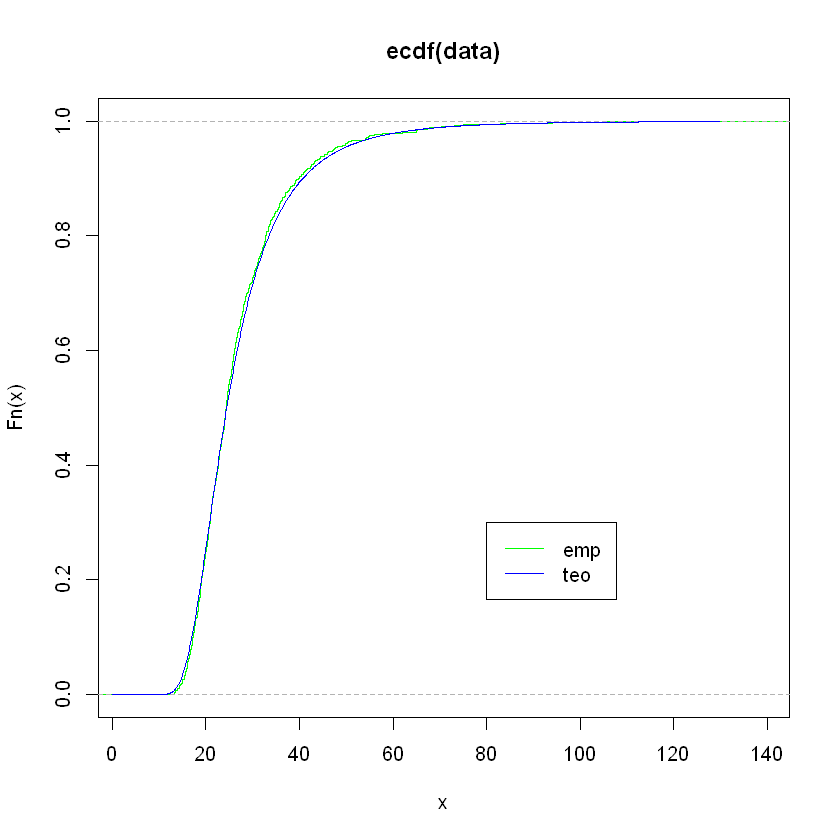

In [47]:
lognoorm(0,1)

In [65]:
#install.packages("sads")
library("sads")
#rpareto(1000,3,4)

Ładowanie wymaganego pakietu: bbmle

Ładowanie wymaganego pakietu: stats4



In [54]:
paareto <- function(m,s) {
    data <- rep(0,1000)
    for (i in seq(1,1000,1)) {
        vals <- rpareto(1000,m,s)
        data[i] <- max(vals)
    }
    plot(ecdf(data), col="green")
    x <- seq(0, max(data),0.1)
    lines(x, ppareto(x,m,s)^1000, col="blue")
    legend(500, 0.3, legend=c("emp", "teo"), col=c("green", "blue"), lty=1)
}

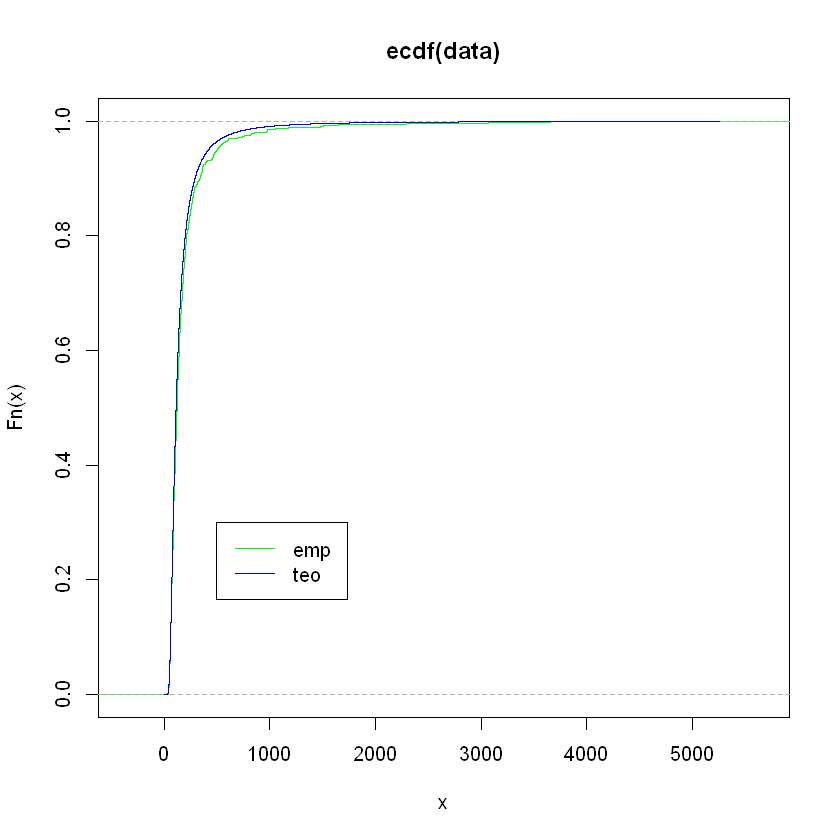

In [56]:
paareto(2,3)

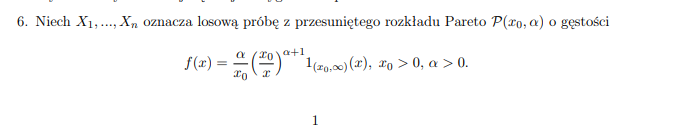
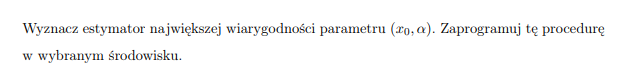

In [62]:
odwr <- function(u, x0, alfa) {
        return(x0/(1-u)^(1/alfa))
}

In [66]:
ppareto <- function(x0,alfa) {
    data_x0 <- rep(0,1000)
    data_alfa <- rep(0,1000)
    
    for (i in seq(1,1000,1)) {
        data <- odwr(runif(1000),x0,alfa)
        valx0 <- min(data)
        data_x0[i] <- valx0
        val <- log(data) - log(valx0)
        data_alfa[i] <- length(data)/sum(val)
    }  
    boxplot(data_x0)
    abline(h=x0, col="red")
    boxplot(data_alfa)
    abline(h=alfa,col="red")
}

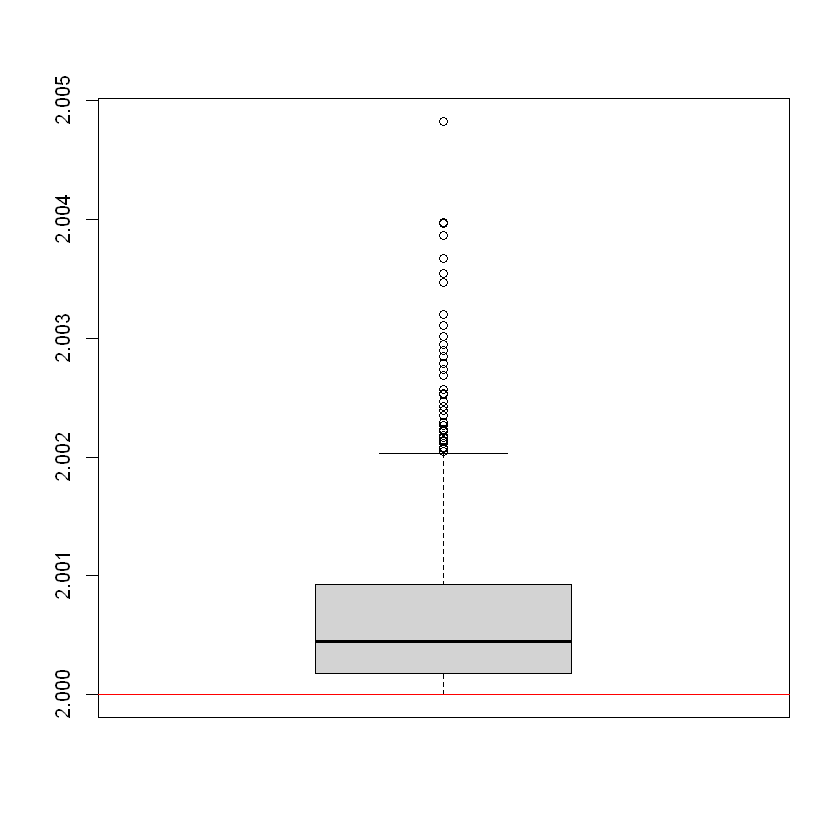

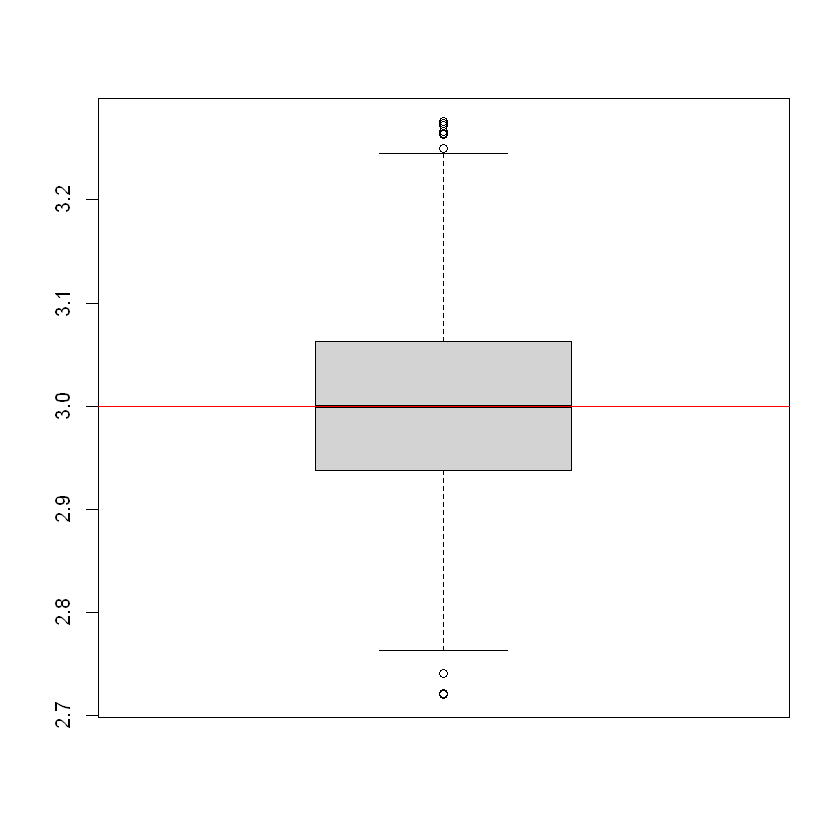

In [67]:
ppareto(2,3)

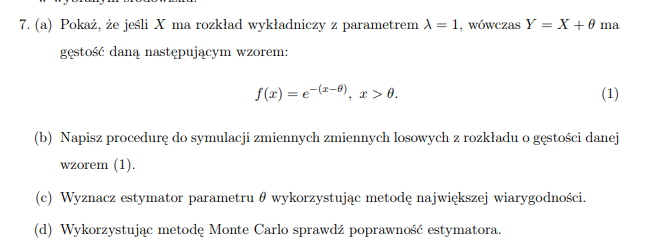

In [68]:
F <- function(x,theta) {
    return(1-exp(1)^(-x+theta))
}
F_odw <- function(u,theta) {
    return(theta - log(1-u))
}

In [2]:
zad_7 <- function(theta){
    data_theta <- rep(0,1000)
    
    for (i in seq(1,1000,1)) {
        data <- rexp(1000,1) + theta
        data_theta[i] <- min(data)
    }    
    boxplot(data_theta)
    abline(h=theta, col="red", lty=2)
}

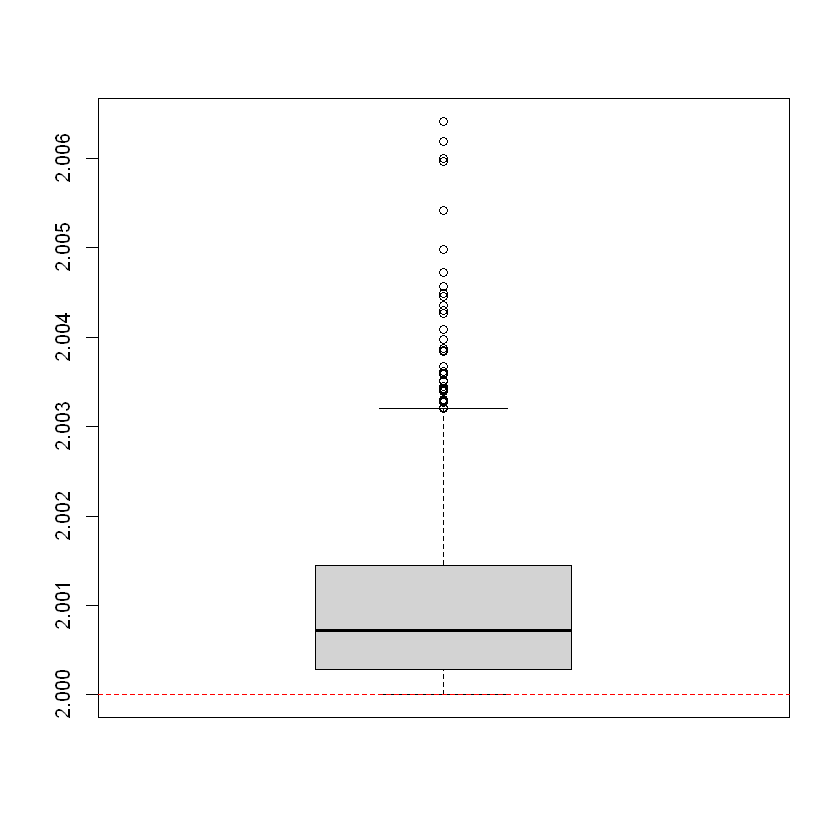

In [3]:
zad_7(2)

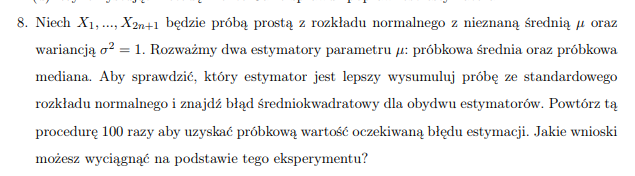

In [91]:
proby2 <- function(m,N) {
    srs <- meds <- rep(0,1000)
    num <- as.integer(2*N +1)
    for (n in seq(1,1000,1)) {
        data <- rnorm(num,m,1)
        val_med <- (median(data)-m)^2
        val_sr <- (mean(data)-m)^2
        meds[n] <-val_med
        srs[n] <- val_sr
    }
    data <- data.frame(mediana = meds, srednia = srs)
    boxplot(data)
    abline(h=0, col="red")
}

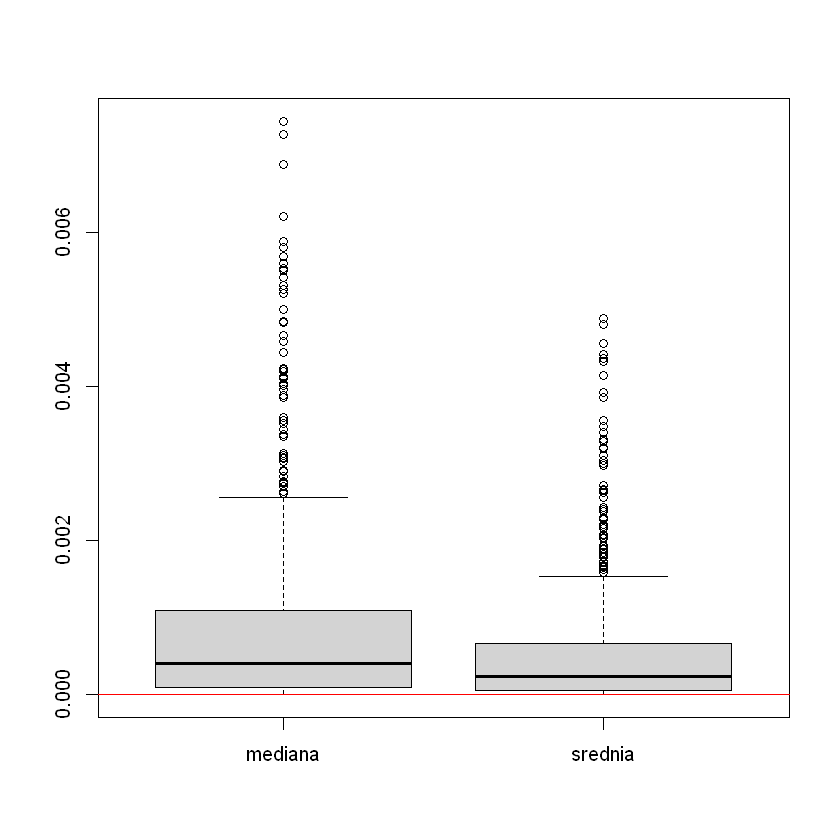

In [93]:
proby2(2,1000)

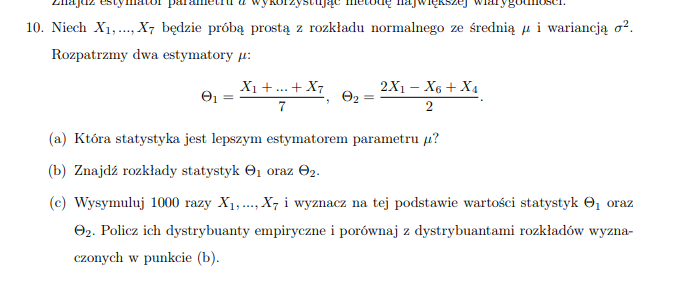

In [15]:
zad10 <- function(m,s) {
    thet1 <- thet2 <- rep(0,1000)
    
    for (n in seq(1,1000,1)) {
        data <- rnorm(7, m, s)
        thet1[n] <- mean(data)
        thet2[n] <- (2*data[1] - data[6] + data[4])/2
    }
    data <- data.frame(theta1 = thet1, theta2 = thet2)
    boxplot(data)
    abline(h=m, col="red")
    
    xs <- seq(min(thet2) - 1, max(thet2) + 1, 0.1)
    y_1 <- pnorm(xs, m, s/sqrt(7))
    y_2 <- pnorm(xs, m, s*sqrt(3/2))
    
    par(mfrow=c(1,2))
    plot(xs, y_1, main="theta1", type="l", col="blue")
    lines(ecdf(thet1), col="magenta")
    
    plot(xs, y_2, main="theta2", type="l", col="blue")
    lines(ecdf(thet2), col="magenta")
}

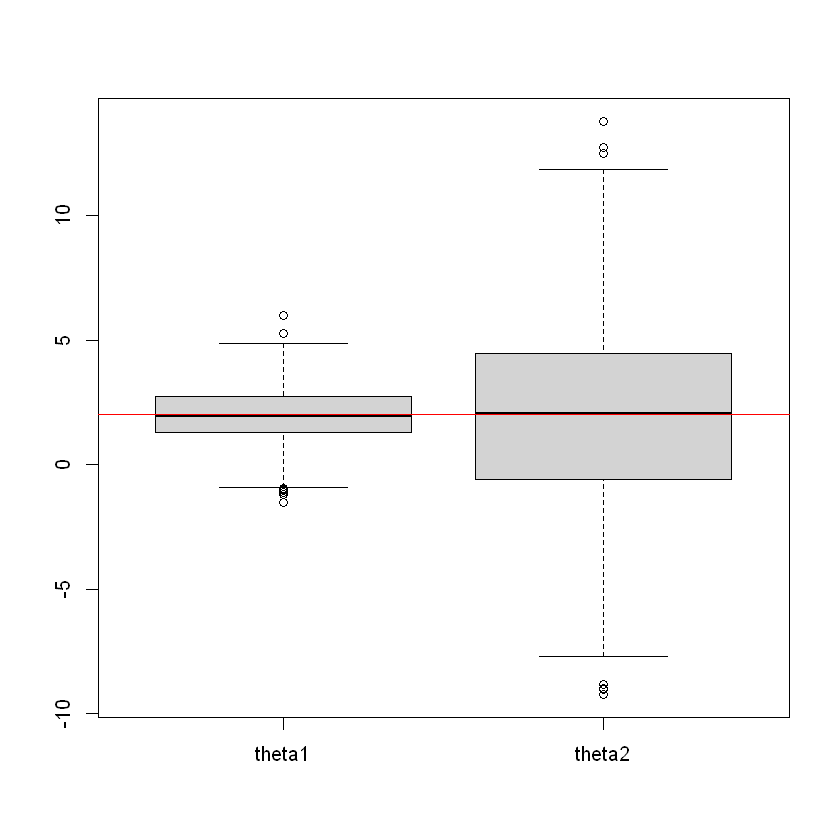

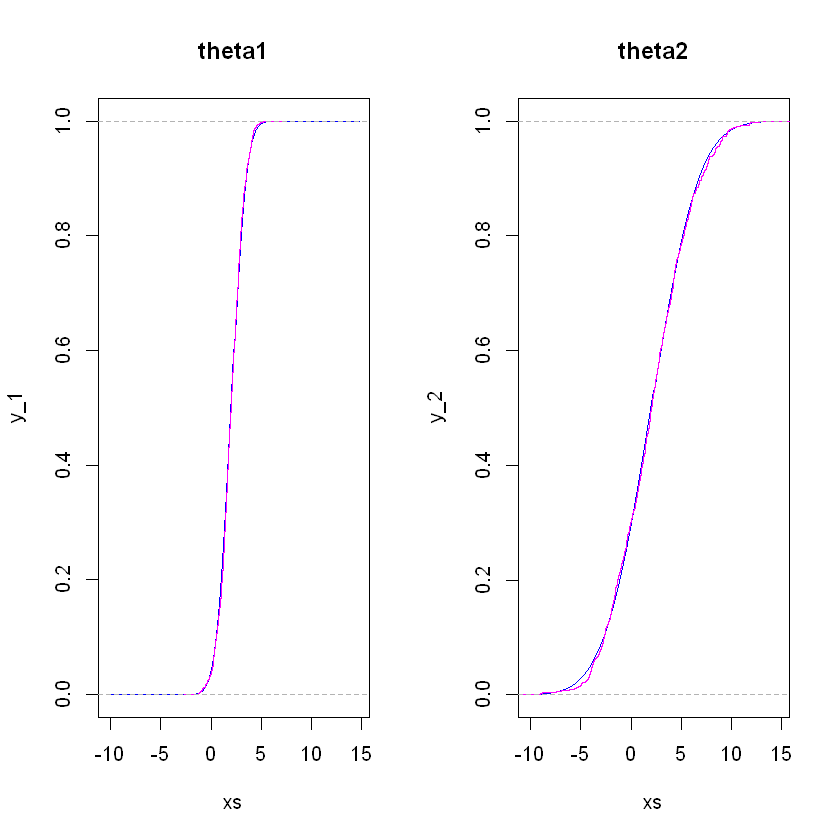

In [16]:
zad10(2,3)

# LISTA 5

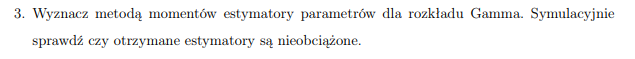

In [25]:
zad_3 <- function(alfa,beta) {
    
    data_alfa <- data_beta <- rep(0,1000)
    
    for (i in seq(1,1000,1)) {
        data <- rgamma(1000, shape=alfa, rate=beta)
        EX <- 1/length(data)*sum(data)
        D2X <- sd(data)^2
        val_al <- EX^2/D2X
        val_beta <- EX/D2X
        data_alfa[i] <- val_al
        data_beta[i] <- val_beta
    }
    data <- data.frame(alfa = data_alfa, beta = data_beta)
    boxplot(data)
    abline(h=alfa, col="red")
    abline(h=beta, col="red")
}    

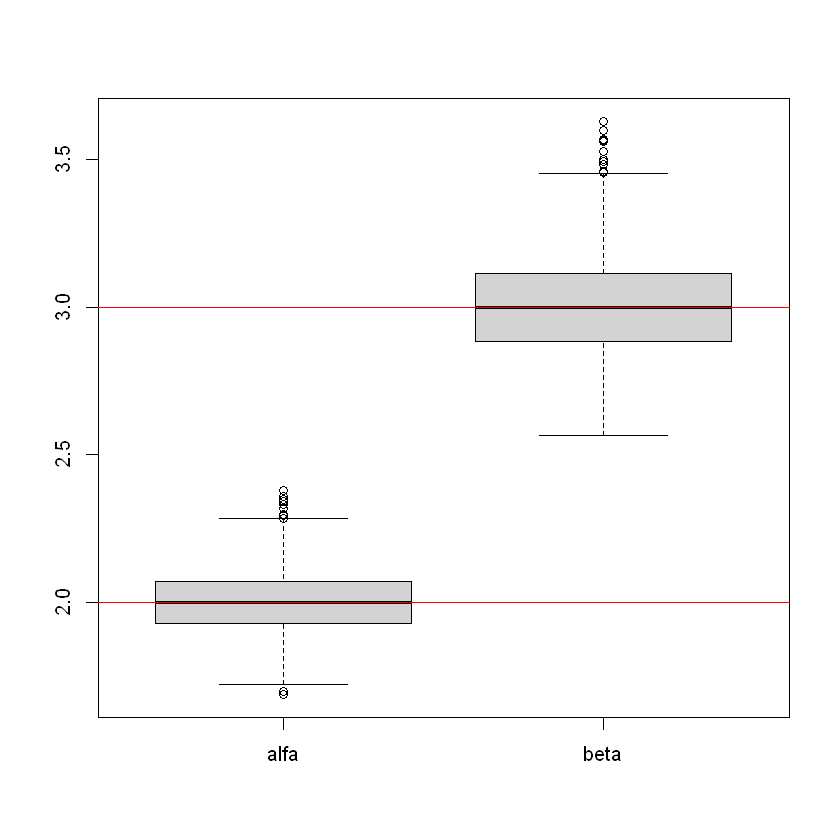

In [26]:
zad_3(2,3)

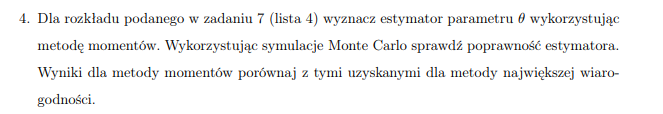

In [29]:
zad_4 <- function(theta){
    data_NW <- data_MM <- rep(0,1000)
    
    for (i in seq(1,1000,1)) {
        data <- rexp(1000,1) + theta
        data_NW[i] <- min(data)
        data_MM[i]  <- mean(data) -1
    }    
    data <- data.frame(NW = data_NW, MM = data_MM)
    boxplot(data)
    abline(h=theta, col="red")
}

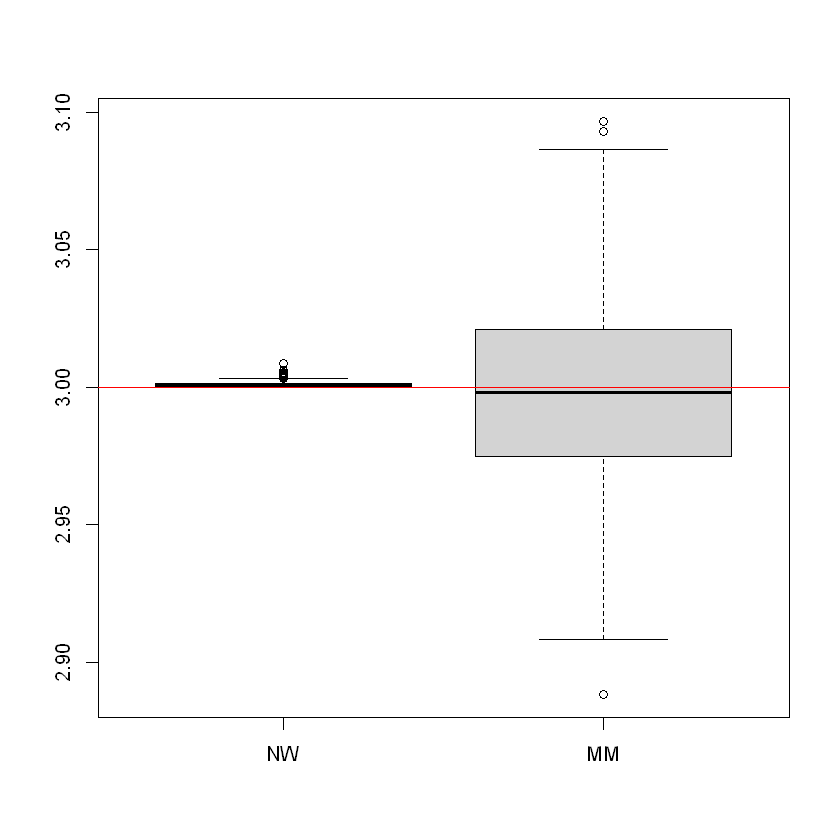

In [30]:
zad_4(3)

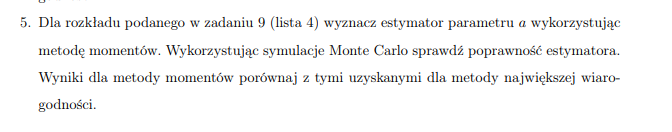

In [31]:
odwr <- function(x,a) {
    return(x^(1/(a+1)))
}

In [33]:
zad_5 <- function(a){
    data_NW <- data_MM <- rep(0,1000)
    
    for (i in seq(1,1000,1)) {
        data <- odwr(runif(1000),a)
        data_NW[i] <- (2*mean(data)-1)/(1-mean(data))
        data_MM[i]  <- -length(data)/sum(log(data))-1
    }    
    data <- data.frame(NW = data_NW, MM = data_MM)
    boxplot(data)
    abline(h=a, col="red")
}

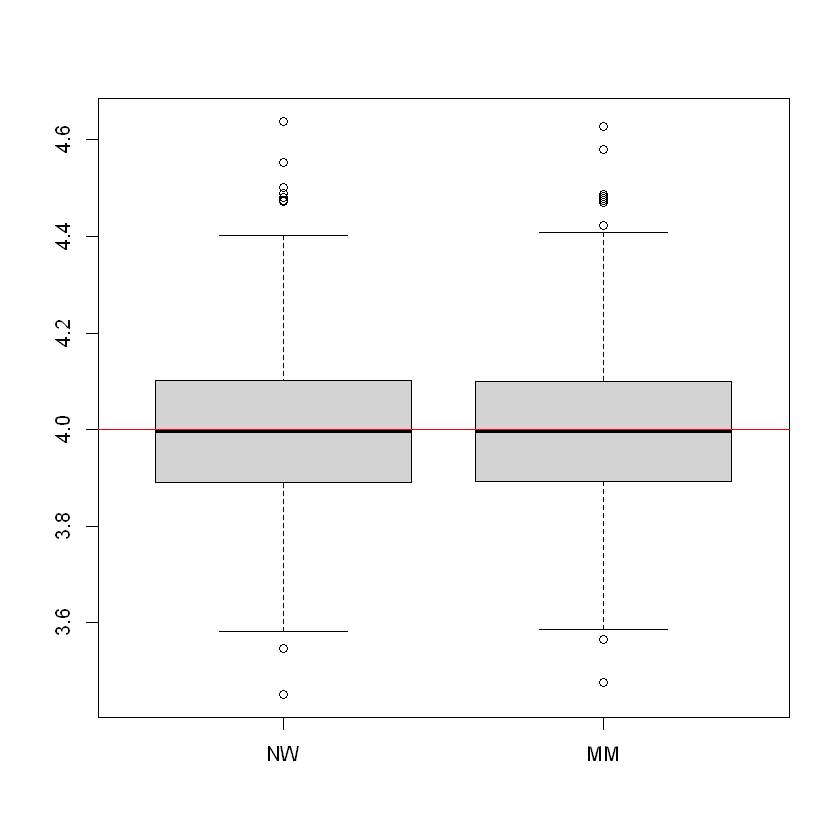

In [35]:
zad_5(4)

# LISTA 6

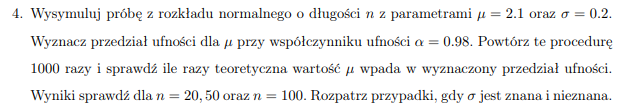

In [39]:
zad1_1 <- function() {
    ns <- c(20,50,100)
    mi <- 2.1
    s <- 0.2
    alfa <- 0.02
    
    yes <- c(0,0,0)
    for (MCS in seq(1,1000,1)) {
        i <- 1
        for (n in ns) {
            data <- rnorm(n, mi, s)
            
            sr <- mean(data)
            val_min <- sr - qnorm(1-alfa/2)*s/sqrt(n)
            val_max <- sr + qnorm(1-alfa/2)*s/sqrt(n)
            
            if (val_min < mi && mi < val_max) {
                yes[i] <- yes[i] + 1
                }
            i <- i +1
        }
    }        
    pp <- yes/1000
    return(pp)
}

In [44]:
zad1_1()

[1] 0.983 0.985 0.985

In [45]:
zad1_2 <- function() {
    ns <- c(20,50,100)
    mi <- 2.1
    s <- 0.2
    alfa <- 0.02
    
    yes <- c(0,0,0)
    for (MCS in seq(1,1000,1)) {
        i <- 1
        for (n in ns) {
            data <- rnorm(n, mi, s)
            
            sr <- mean(data)
            odch <- sd(data)
            val_min <- sr - qt(1-alfa/2, n-1)*odch/sqrt(n)
            val_max <- sr + qt(1-alfa/2, n-1)*odch/sqrt(n)
            
            if (val_min < mi && mi < val_max) {
                yes[i] <- yes[i] + 1
                }
            i <- i +1
        }
    }        
    pp <- yes/1000
    return(pp)
}

In [48]:
zad1_2()

[1] 0.983 0.977 0.985

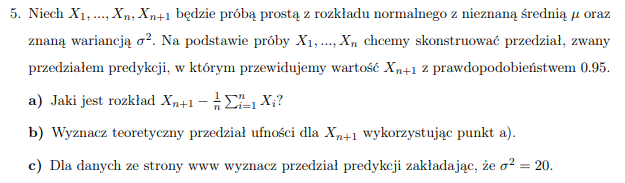

In [59]:
zad_5 <- function() {
    n <- 2001
    s <- sqrt(20)
    alfa <- 0.05
    data <- rnorm(n,5,s)
    sr <- mean(data)
    pu <- c(sr - sqrt((n+1)/n)*s*qnorm(1-alfa/2), sr + sqrt((n+1)/n)*s*qnorm(1-alfa/2))
    return(c(pu, data[length(data)]))
}

In [60]:
zad_5()

[1] -3.704988 13.829842  6.302323

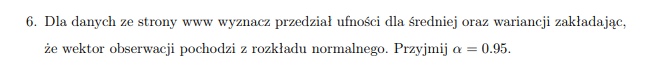

In [63]:
zad_6 <- function() {
    
    n <- 10000
    s <- 5
    mi <- 3
    alfa <- 0.03
    
    data <- rnorm(n,mi,s) 
    
    sr <- mean(data)
    odch <- sd(data)
    pu_1 <- c(sr -s*qnorm(1-alfa/2)/sqrt(n), sr + s*qnorm(1-alfa/2)/sqrt(n))
    pu_2 = c(sr -odch*qt(1-alfa/2,n-1)/sqrt(n), sr + odch*qt(1-alfa/2,n-1)/sqrt(n))
    pu_3 = c((n-1)*odch^2/qchisq(1-alfa/2,n-1), (n-1)*odch^2/qchisq(alfa/2,n-1))
    
    cat("mi = 3\n")
    cat("znana var: ", pu_1)
    cat("\nnieznana var: ", pu_2)
    cat("\ns = 25: ", pu_3)
    return(c(pu_1, pu_2, pu_3))
}

In [64]:
zad_6()

mi = 3
znana var:  2.874247 3.091256
nieznana var:  2.873822 3.09168
s = 25:  24.4328 25.97961

[1]  2.874247  3.091256  2.873822  3.091680 24.432796 25.979613